# Example: Ensembles
--------------------

This example shows how to use atom's ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

## Run the pipeline

In [3]:
# Initialize atom and train several models
atom = ATOMClassifier(X, y, verbose=2, random_state=1)
atom.run(models=["LR", "Tree", "LGB"], metric="accuracy")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 138.96 kB
Scaled: False
Outlier values: 167 (1.2%)


Training ========================= >>
Models: LR, Tree, LGB
Metric: accuracy


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.989
Test evaluation --> accuracy: 0.9823
Time elapsed: 0.037s
-------------------------------------------------
Total time: 0.037s


Results for DecisionTree:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9469
Time elapsed: 0.019s
-------------------------------------------------
Total time: 0.019s


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9469
Time el

## Voting

In [4]:
# Combine the models into a Voting model
atom.voting(voting="soft")

Results for Voting:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9469
Time elapsed: 0.026s


In [5]:
# Note that we now have an extra model in the pipeline
atom.models

['LR', 'Tree', 'LGB', 'Vote']

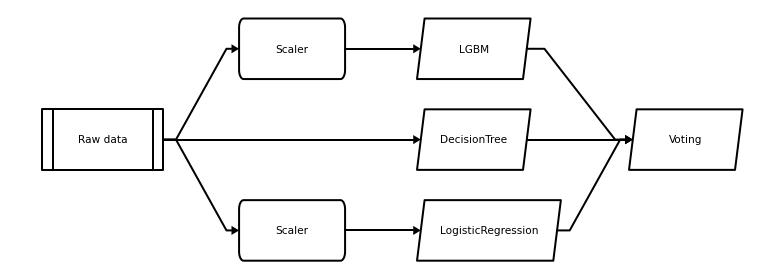

In [6]:
# The plot_pipeline method helps us visualize the ensemble
atom.plot_pipeline()

In [7]:
# The Vote model averages the scores of the models it contains
atom.vote

Voting()

In [8]:
# We can use it like any other model to make predictions or plots
atom.vote.predict_proba_test[:10]

0         1
456  0.060290  0.939710
457  0.999984  0.000016
458  0.000018  0.999982
459  0.000046  0.999954
460  0.999990  0.000010
461  0.028359  0.971641
462  0.000027  0.999973
463  0.000224  0.999776
464  0.999975  0.000025
465  0.000016  0.999984

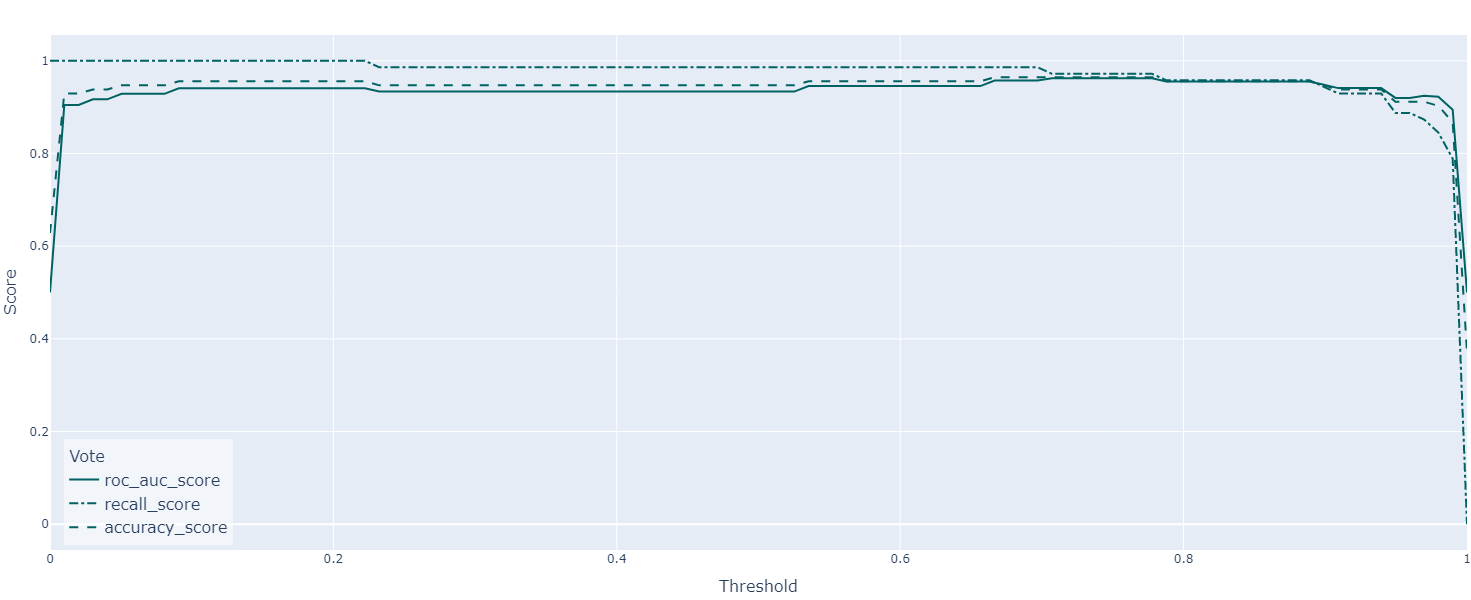

In [9]:
atom.vote.plot_threshold(metric=["auc", "recall", "accuracy"])

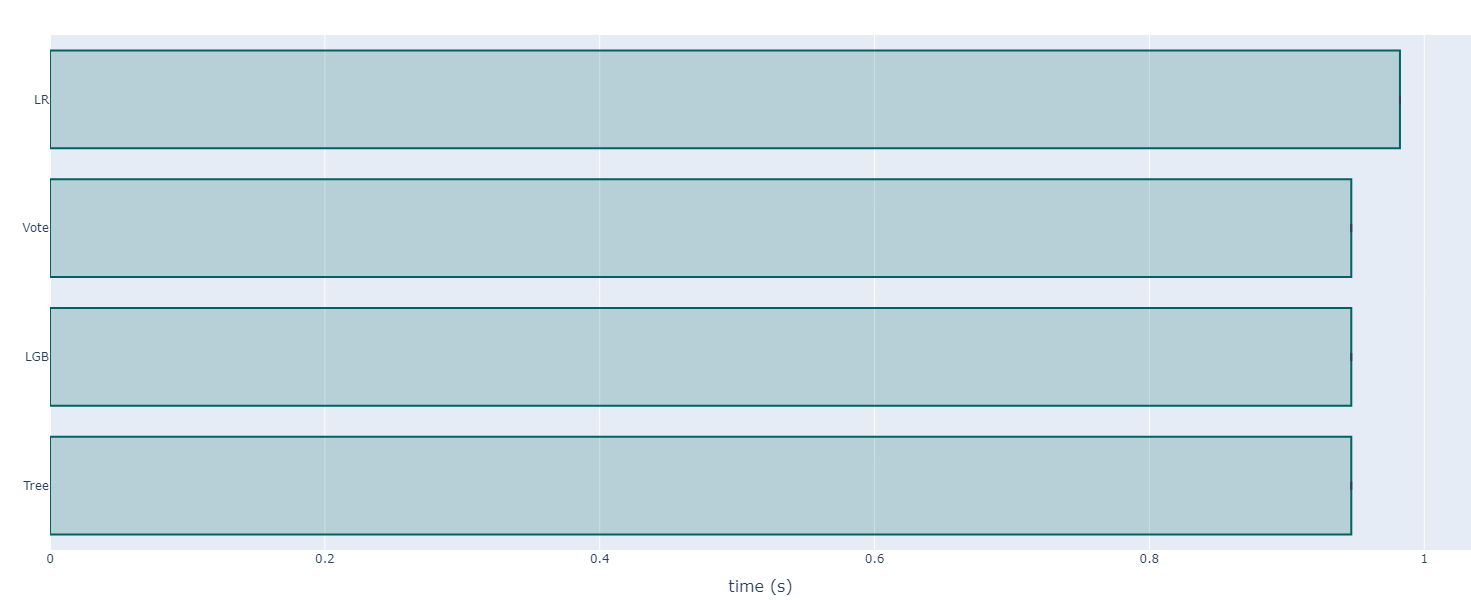

In [10]:
atom.plot_results(legend=None)

In [11]:
atom.delete("vote")

Deleting 1 models...
 --> Model Vote successfully deleted.


## Stacking

In [12]:
# Just like Voting, we can create a Stacking model
atom.stacking(final_estimator="LDA")

Results for Stacking:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9934
Test evaluation --> accuracy: 0.9823
Time elapsed: 0.636s


In [13]:
# The final estimator uses the predictions of the underlying models
atom.stack.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.48         20.82           88.40      559.2          0.10160   
1        18.31         20.58          120.80     1052.0          0.10680   
2        17.93         24.48          115.20      998.9          0.08855   
3        15.13         29.81           96.71      719.5          0.08320   
4         8.95         15.76           58.74      245.2          0.09462   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12550         0.10630              0.05439         0.1720   
1           0.12480         0.15690              0.09451         0.1860   
2           0.07027         0.05699              0.04744         0.1538   
3           0.04605         0.04686              0.02739         0.1852   
4           0.12430         0.09263              0.02308         0.1305   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.06419  ...          26.02           107.30       740.4   
1                 0.05941  ...          26.20           142.20      1493.0   
2                 0.05510  ...          34.69           135.10      1320.0   
3                 0.05294  ...          36.91           110.10       931.4   
4                 0.07163  ...          17.07            63.34       270.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1610            0.42250           0.5030               0.22580   
1            0.1492            0.25360           0.3759               0.15100   
2            0.1315            0.18060           0.2080               0.11360   
3            0.1148            0.09866           0.1547               0.06575   
4            0.1179            0.18790           0.1544               0.03846   

   worst symmetry  worst fractal dimension  target  
0          0.2807                  0.10710       0  
1          0.3074                  0.07863       0  
2          0.2504                  0.07948       0  
3          0.3233                  0.06165       0  
4          0.1652                  0.07722       1  

[5 rows x 31 columns]

In [14]:
# Again, the model can be used for predictions or plots
atom.stack.predict(X)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

Permutation explainer: 114it [00:42,  2.15it/s]                                                                                                                                                                                                                                                                        


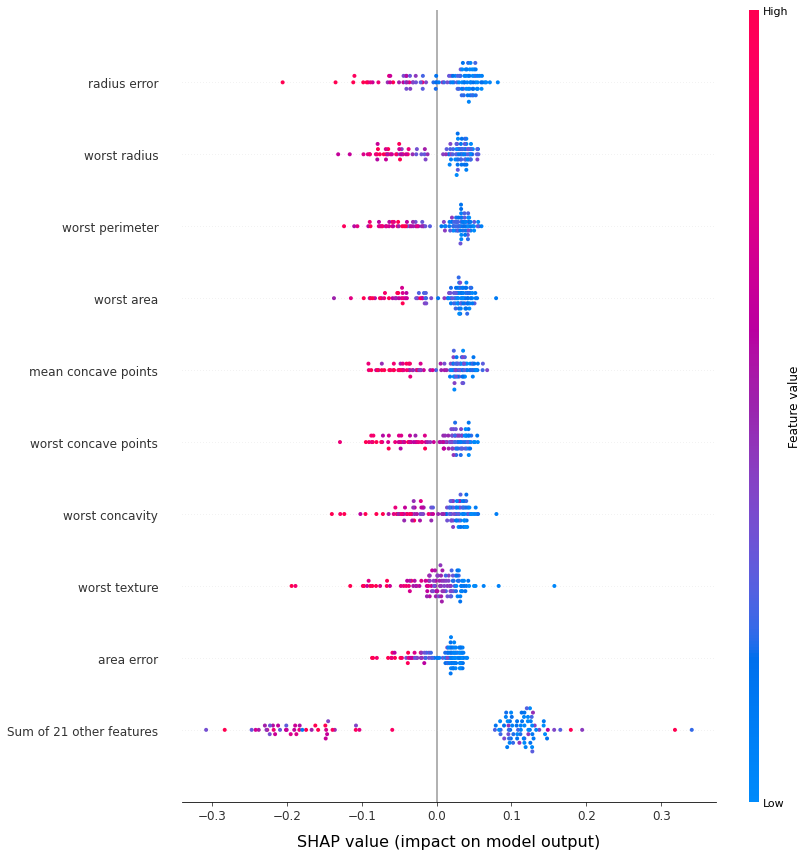

In [15]:
atom.stack.plot_shap_beeswarm(show=10)